In [1]:
from google.colab import files
uploaded = files.upload()


Saving country_wise_latest.csv to country_wise_latest.csv


In [2]:
import pandas as pd

# Leer el archivo subido
df = pd.read_csv('country_wise_latest.csv')

# Ver las primeras filas
df.head()


,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
0,Afghanistan,36263,1269,25198,9796,106,10,18,3.50,69.49,5.04,35526,737,2.07,Eastern Mediterranean
1,Albania,4880,144,2745,1991,117,6,63,2.95,56.25,5.25,4171,709,17.00,Europe
2,Algeria,27973,1163,18837,7973,616,8,749,4.16,67.34,6.17,23691,4282,18.07,Africa
3,Andorra,907,52,803,52,10,0,0,5.73,88.53,6.48,884,23,2.60,Europe
4,Angola,950,41,242,667,18,1,0,4.32,25.47,16.94,749,201,26.84,Africa


In [8]:
# Verificar valores faltantes en el conjunto de datos
missing_values_new = df.isnull().sum()

# Verificar duplicados
duplicates_new = df.duplicated().sum()

# Renombrar columnas para claridad
df.rename(columns={
    'Country/Region': 'Country',
    'New cases': 'New_Cases',
    'New deaths': 'New_Deaths',
    'New recovered': 'New_Recovered',
    'Deaths / 100 Cases': 'Deaths_Per_100_Cases',
    'Recovered / 100 Cases': 'Recovered_Per_100_Cases',
    'Deaths / 100 Recovered': 'Deaths_Per_100_Recovered',
    'Confirmed last week': 'Confirmed_Last_Week',
    '1 week change': 'One_Week_Change',
    '1 week % increase': 'One_Week_Percent_Increase',
}, inplace=True)

# Revisar valores atípicos básicos (casos confirmados no pueden ser negativos)
df = df[df['Confirmed'] >= 0]

# Resultado después de limpieza inicial
missing_values_new, duplicates_new, df.head()


(Country/Region            0
 Confirmed                 0
 Deaths                    0
 Recovered                 0
 Active                    0
 New cases                 0
 New deaths                0
 New recovered             0
 Deaths / 100 Cases        0
 Recovered / 100 Cases     0
 Deaths / 100 Recovered    0
 Confirmed last week       0
 1 week change             0
 1 week % increase         0
 WHO Region                0
 dtype: int64,
 0,
        Country  Confirmed  Deaths  Recovered  Active  New_Cases  New_Deaths  \
 0  Afghanistan      36263    1269      25198    9796        106          10   
 1      Albania       4880     144       2745    1991        117           6   
 2      Algeria      27973    1163      18837    7973        616           8   
 3      Andorra        907      52        803      52         10           0   
 4       Angola        950      41        242     667         18           1   
 
    New_Recovered  Deaths_Per_100_Cases  Recovered_Per_100_Cases

In [9]:
# Análisis exploratorio de datos (EDA)

# 1. Estadísticas descriptivas generales
stats_summary = df.describe()

# 2. Distribución de los casos confirmados
confirmed_distribution = df['Confirmed'].describe()

# 3. Identificar los países con más casos confirmados
top_countries_confirmed = df[['Country', 'Confirmed']].sort_values(by='Confirmed', ascending=False).head(10)

# 4. Identificar las regiones de la OMS con más casos confirmados
top_regions_who = df.groupby('WHO Region')['Confirmed'].sum().sort_values(ascending=False)

# Mostrar resultados
print("Estadísticas descriptivas generales:\n", stats_summary)
print("\nDistribución de casos confirmados:\n", confirmed_distribution)
print("\nPaíses con más casos confirmados:\n", top_countries_confirmed)
print("\nRegiones de la OMS con más casos confirmados:\n", top_regions_who)


Estadísticas descriptivas generales:
           Confirmed         Deaths     Recovered        Active     New_Cases  \
count  1.870000e+02     187.000000  1.870000e+02  1.870000e+02    187.000000   
mean   8.813094e+04    3497.518717  5.063148e+04  3.400194e+04   1222.957219   
std    3.833187e+05   14100.002482  1.901882e+05  2.133262e+05   5710.374790   
min    1.000000e+01       0.000000  0.000000e+00  0.000000e+00      0.000000   
25%    1.114000e+03      18.500000  6.265000e+02  1.415000e+02      4.000000   
50%    5.059000e+03     108.000000  2.815000e+03  1.600000e+03     49.000000   
75%    4.046050e+04     734.000000  2.260600e+04  9.149000e+03    419.500000   
max    4.290259e+06  148011.000000  1.846641e+06  2.816444e+06  56336.000000   

        New_Deaths  New_Recovered  Deaths_Per_100_Cases  \
count   187.000000     187.000000            187.000000   
mean     28.957219     933.812834              3.019519   
std     120.037173    4197.719635              3.454302   
min  

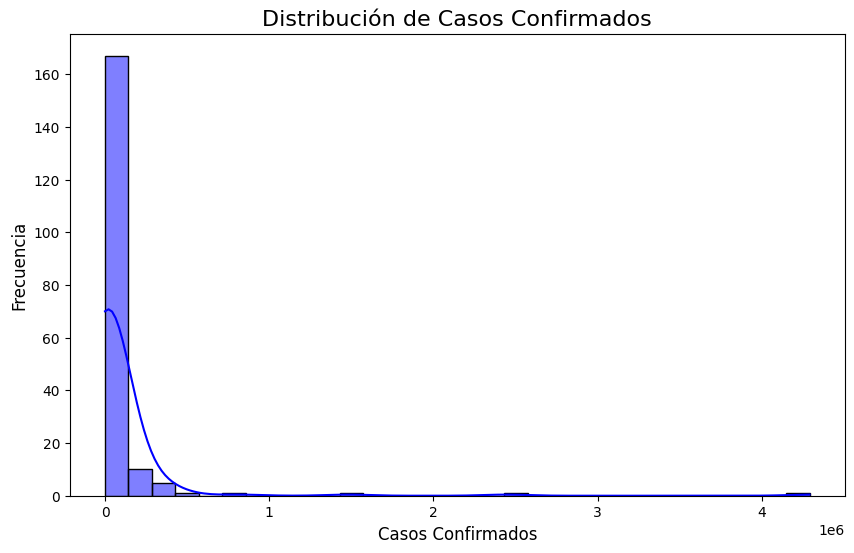

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograma de casos confirmados
plt.figure(figsize=(10, 6))
sns.histplot(df['Confirmed'], bins=30, kde=True, color='blue')
plt.title('Distribución de Casos Confirmados', fontsize=16)
plt.xlabel('Casos Confirmados', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.show()


<ipython-input-11-13366d5ee0ea>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_countries, x='Confirmed', y='Country', palette='viridis')


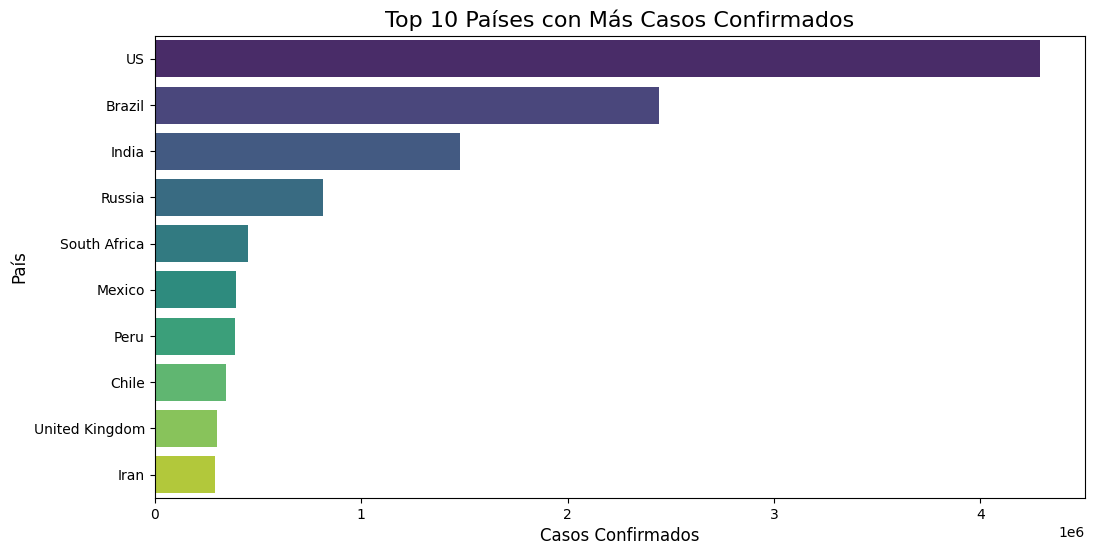

In [11]:
# Filtrar los 10 países con más casos confirmados
top_countries = df[['Country', 'Confirmed']].sort_values(by='Confirmed', ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(data=top_countries, x='Confirmed', y='Country', palette='viridis')
plt.title('Top 10 Países con Más Casos Confirmados', fontsize=16)
plt.xlabel('Casos Confirmados', fontsize=12)
plt.ylabel('País', fontsize=12)
plt.show()


<ipython-input-12-c456c15ab758>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cases_by_region.values, y=cases_by_region.index, palette='coolwarm')


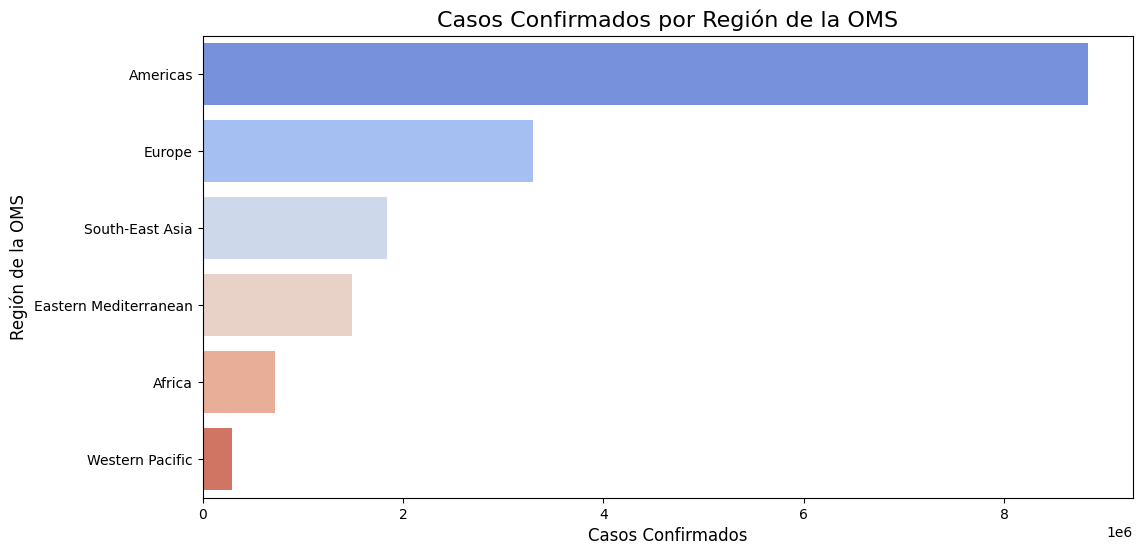

In [12]:
# Agrupar los casos por región de la OMS
cases_by_region = df.groupby('WHO Region')['Confirmed'].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=cases_by_region.values, y=cases_by_region.index, palette='coolwarm')
plt.title('Casos Confirmados por Región de la OMS', fontsize=16)
plt.xlabel('Casos Confirmados', fontsize=12)
plt.ylabel('Región de la OMS', fontsize=12)
plt.show()


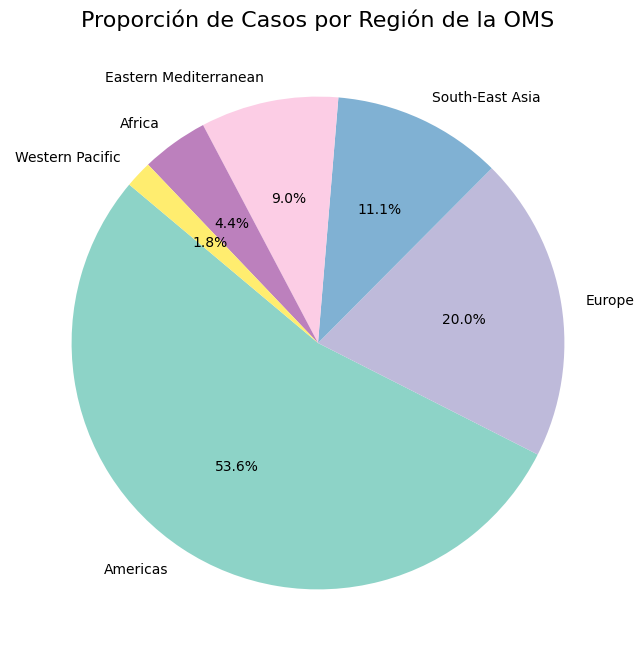

In [13]:
# Casos por región
plt.figure(figsize=(8, 8))
cases_by_region.plot.pie(autopct='%1.1f%%', startangle=140, cmap='Set3')
plt.title('Proporción de Casos por Región de la OMS', fontsize=16)
plt.ylabel('')
plt.show()
